<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Logistic_Regression_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression (Iris dataset)

In [ ]:
# Import Necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn                 import datasets
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load the dataset
np.set_printoptions(precision=3)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Data splitting (80% training data, 20% testing data)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # compute mean/std and transform training data
x_test  = scaler.transform(x_test)      # use same scaling on test data

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression(solver="lbfgs")
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Predictions
y_pred = model.predict(x_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
# Evaluation Metrics
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Accuracy:  1.0
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Figure size 600x400 with 0 Axes>

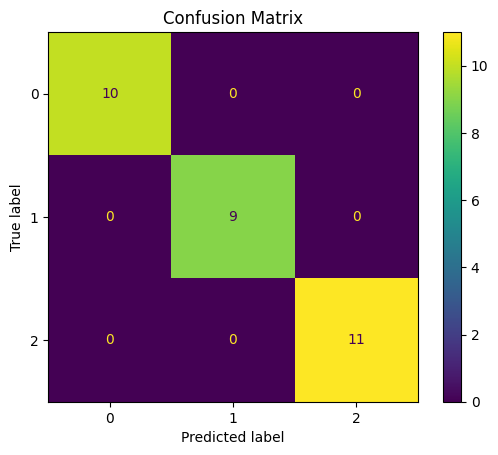

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
disp = ConfusionMatrixDisplay (confusion_matrix = cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import log_loss

# Get predictions (probabilities)
y_pred_probs = model.predict_proba(x_test)

# Compute Cross-Entropy Loss
loss = log_loss(y_test, y_pred_probs)
print(f"Cross-Entropy loss on Iris dataset : {loss:.4f}")

Cross-Entropy loss on Iris dataset : 0.1203
